In [1]:
import csv
import json
import sqlite3
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from datetime import datetime

[Finished Date] 2025-03-26 08:29:10
[Time Used] 11.5 mins
[Questionnaire] {'country': 'United States', 'age': '46-50', 'engagement': '10', 'difficulty': '4', 'mode': 'live', 'gender': 'female', 'education': 'high school', 'ai-experience': '1', 'condition': 0, 'native': 'yes'}
[Counterbalance] 0
[Dummy Test Acc] 41/60
{'h_machine': array([[17.,  7.],
       [ 8., 16.]]), 'h_ivsn': array([[4., 4.]]), 'h_gbvs': array([[1., 7.]]), 'h_deepgaze': array([[3., 5.]])}
catch [[0. 0.]]
swap [[0. 0.]]
[Finished Date] 2025-03-26 08:32:28
[Time Used] 13.7 mins
[Questionnaire] {'country': 'United States', 'age': '41-45', 'engagement': '4', 'difficulty': '9', 'mode': 'live', 'gender': 'male', 'education': 'master', 'ai-experience': '2', 'condition': 0, 'native': 'yes'}
[Counterbalance] 0
[Dummy Test Acc] 44/60
{'h_machine': array([[18.,  6.],
       [11., 13.]]), 'h_ivsn': array([[5., 3.]]), 'h_gbvs': array([[3., 5.]]), 'h_deepgaze': array([[3., 5.]])}
catch [[0. 0.]]
swap [[0. 0.]]
[Finished Date] 20

/tmp/ipykernel_967024/1543987787.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(5, 3))


{'h_machine': array([[13., 11.],
       [11., 13.]]), 'h_ivsn': array([[4., 4.]]), 'h_gbvs': array([[3., 5.]]), 'h_deepgaze': array([[4., 4.]])}
catch [[0. 0.]]
swap [[0. 0.]]
[Finished Date] 2025-03-26 10:55:38
[Time Used] 12.5 mins
[Questionnaire] {'country': 'United States', 'age': '41-45', 'engagement': '9', 'difficulty': '9', 'mode': 'live', 'gender': 'male', 'education': 'high school', 'ai-experience': '0', 'condition': 0, 'native': 'yes'}
[Counterbalance] 0
[Dummy Test Acc] 44/60
{'h_machine': array([[16.,  8.],
       [11., 13.]]), 'h_ivsn': array([[4., 4.]]), 'h_gbvs': array([[4., 4.]]), 'h_deepgaze': array([[3., 5.]])}
catch [[0. 0.]]
swap [[0. 0.]]
[Finished Date] 2025-03-26 10:54:40
[Time Used] 10.2 mins
[Questionnaire] {'country': 'United States', 'age': '36-40', 'engagement': '10', 'difficulty': '8', 'mode': 'live', 'gender': 'female', 'education': 'high school', 'ai-experience': '1', 'condition': 0, 'native': 'yes'}
[Counterbalance] 0
[Dummy Test Acc] 39/60
{'h_machine':

{'h_machine': array([[14., 10.],
       [12., 12.]]), 'h_ivsn': array([[5., 3.]]), 'h_gbvs': array([[0., 8.]]), 'h_deepgaze': array([[7., 1.]])}
catch [[0. 0.]]
swap [[0. 0.]]
[Finished Date] 2025-03-26 13:29:24
[Time Used] 30.4 mins
[Questionnaire] {'country': 'United States', 'age': '46-50', 'engagement': '9', 'difficulty': '2', 'mode': 'live', 'gender': 'male', 'education': 'bachelor', 'ai-experience': '3', 'condition': 0, 'native': 'yes'}
[Counterbalance] 0
[Dummy Test Acc] 47/60
{'h_machine': array([[17.,  7.],
       [12., 12.]]), 'h_ivsn': array([[7., 1.]]), 'h_gbvs': array([[3., 5.]]), 'h_deepgaze': array([[2., 6.]])}
catch [[0. 0.]]
swap [[0. 0.]]
[Finished Date] 2025-03-26 13:29:24
[Time Used] 22.0 mins
[Questionnaire] {'country': 'United States', 'age': '46-50', 'engagement': '9', 'difficulty': '8', 'mode': 'live', 'gender': 'female', 'education': 'high school', 'ai-experience': '1', 'condition': 0, 'native': 'yes'}
[Counterbalance] 0
[Dummy Test Acc] 42/60
{'h_machine': arr

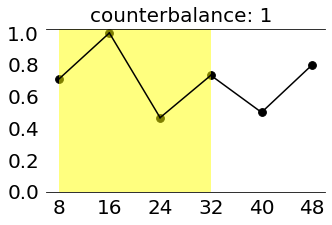

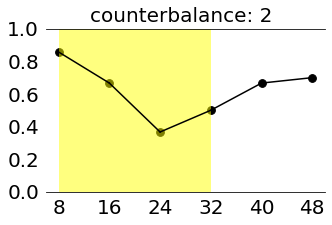

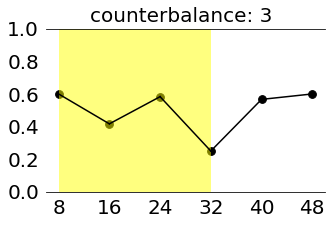

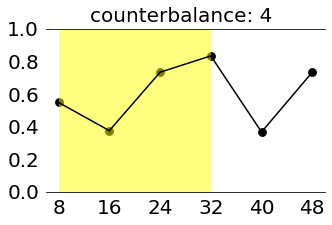

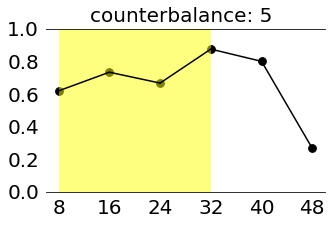

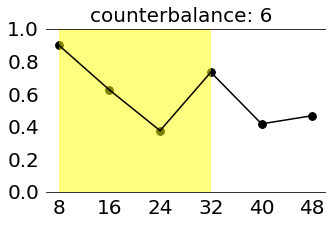

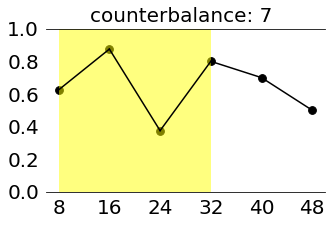

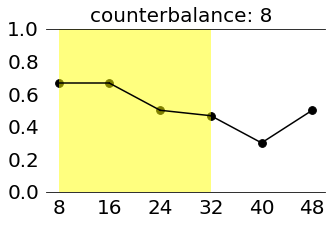

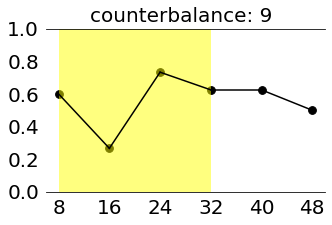

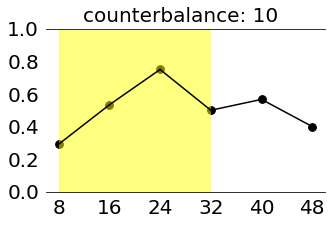

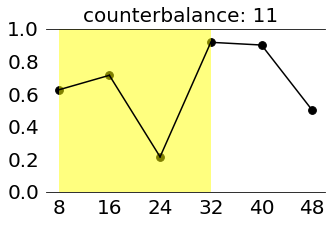

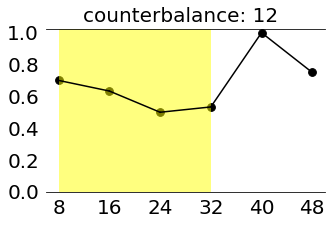

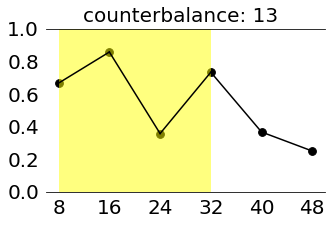

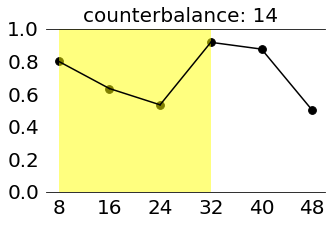

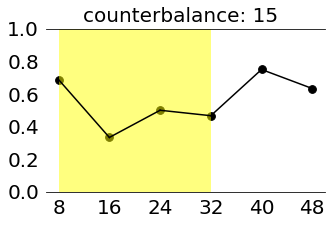

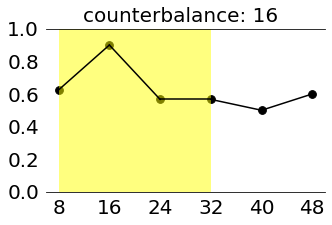

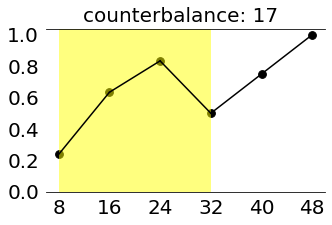

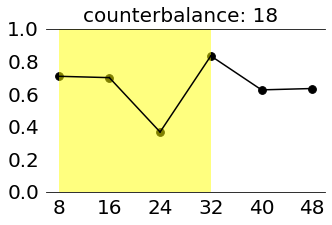

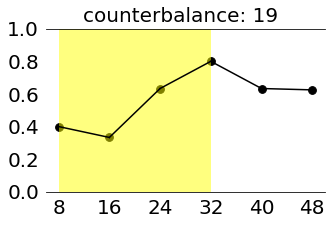

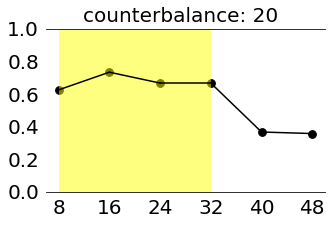

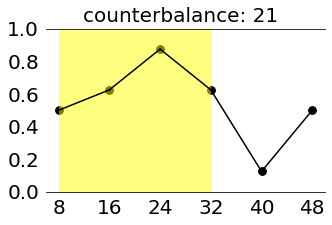

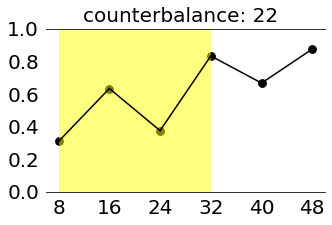

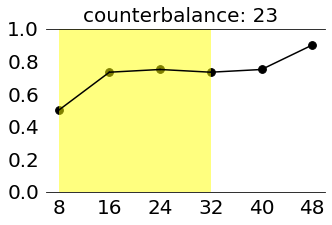

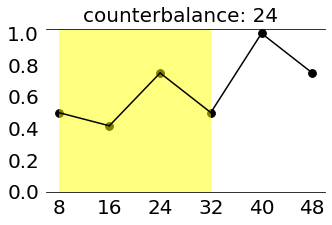

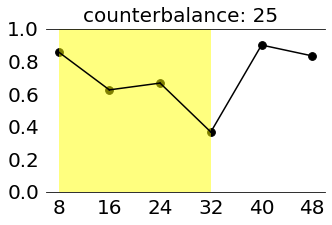

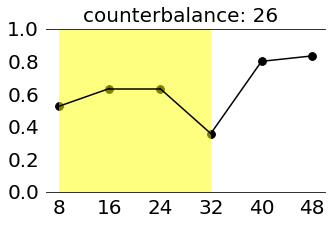

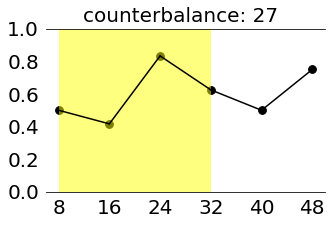

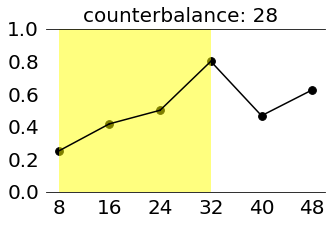

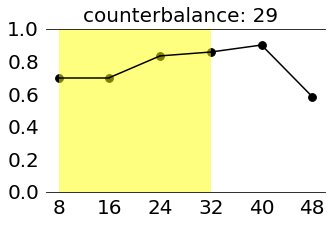

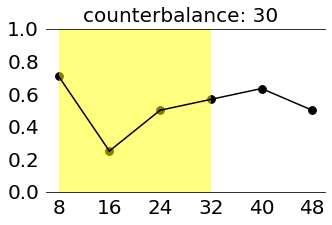

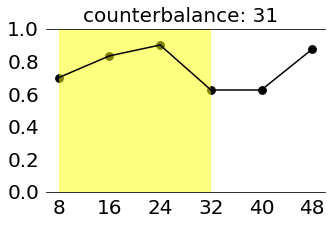

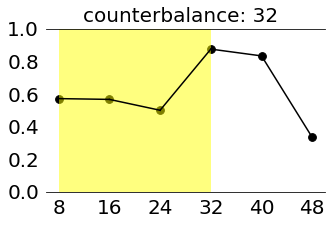

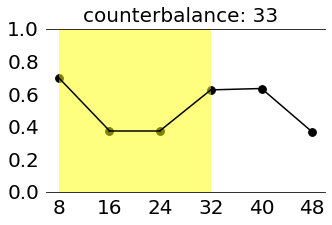

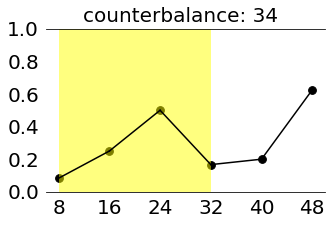

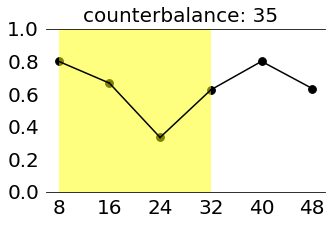

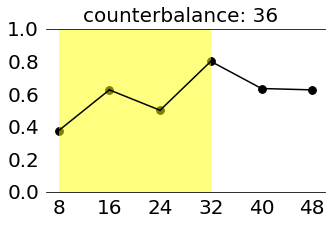

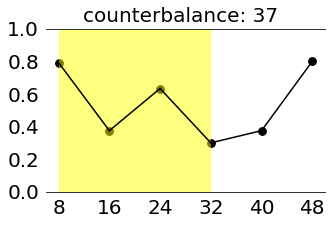

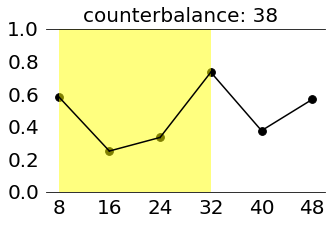

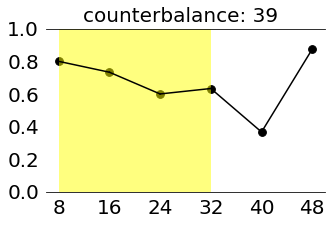

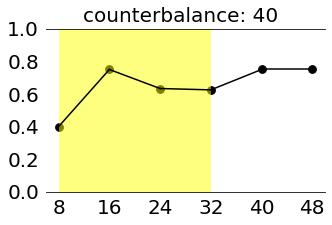

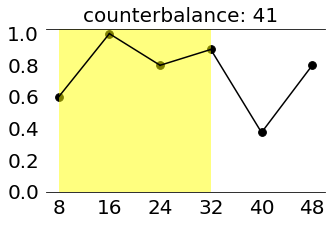

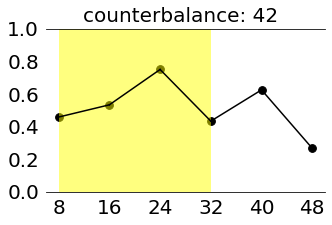

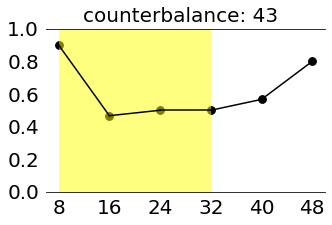

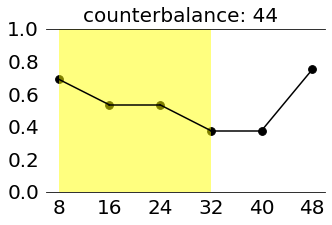

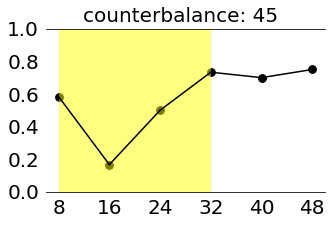

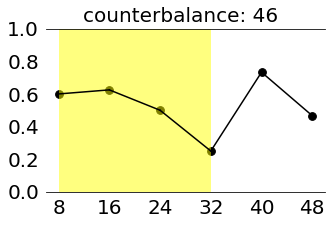

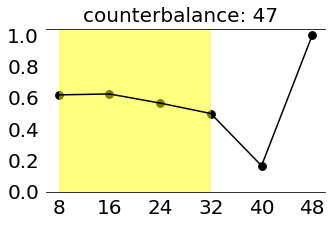

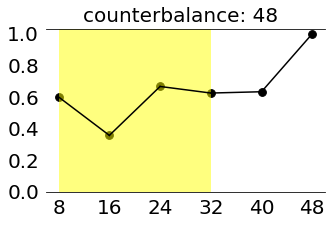

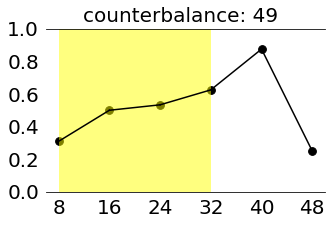

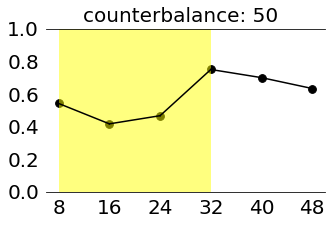

In [2]:
def plot_learning_curve_single_subject(marks_conf,counterbalance):

    fig, ax = plt.subplots(figsize=(5, 3))
    rect = patches.Rectangle((0,-0.2), 3, 1.4, linewidth=1,  facecolor='yellow', alpha=0.5)#edgecolor='r',
    conf_mat = marks_conf[9]
    marks_acc = [(conf_mat.diagonal() / (conf_mat.sum(1)+1e-7)).mean()]
    for i in range(1,6):
        conf_mat = marks_conf[(i+1)*8-1] - marks_conf[i*8-1]
        acc = (conf_mat.diagonal() / (conf_mat.sum(1)+1e-7)).mean()
        marks_acc.append(acc)

    ax.scatter(range(len(marks_acc)),marks_acc,c='black',s=60)

    for i in range(len(marks_acc)-1):
        ax.plot([i,i+1],[marks_acc[i],marks_acc[i+1]],c='black')
    plt.yticks([_*0.1 for _ in range(0,11,2)],[round(_*0.1,1) for _ in range(0,11,2)],fontsize=20)
    plt.xticks(range(len(marks_acc)),[_*8 for _ in range(1,len(marks_acc)+1)],fontsize=20)
    plt.suptitle('counterbalance: {}'.format(counterbalance), fontsize=20)
    # Add the patch to the Axes
    ax.add_patch(rect)
    ax.xaxis.set_ticks_position('none') 
    ax.yaxis.set_ticks_position('none') 
    ax.spines[['right', 'left']].set_visible(False)

def construct_confmat():
    labels = ['h_ivsn','h_gbvs','h_deepgaze']#,'h_catch']
    confmatrices = {**{'h_machine':np.zeros((2,2))}, **{label: np.zeros((1,2)) for label in labels}}
    return confmatrices

def print_metadata(data,dummy_mark='NA'):
    print("====="*20)
    datetime_object1 = datetime.strptime(data[11].split('.')[0], '%Y-%m-%d %H:%M:%S')
    datetime_object2 = datetime.strptime(data[13].split('.')[0], '%Y-%m-%d %H:%M:%S')
    time_used = datetime_object2 - datetime_object1
    time_used = round(time_used.seconds/60,1)
    print("[Finished Date]",datetime_object2)
    print("[Time Used] {} mins".format(time_used))
    print("[Questionnaire]", json.loads(data[-1])["questiondata"])
    print("[Counterbalance]", json.loads(data[-1])["counterbalance"])
    print("[Dummy Test Acc]", dummy_mark)
    return time_used, json.loads(data[-1])["counterbalance"]

conn = sqlite3.connect("ec2_db/turing_feedback.db")
cursor = conn.cursor()
cursor.execute("select * from newdb;")

label_dict = {'human':0,'machine':1,'Human':0,'Machine':1,'ivsn':1,'gbvs':1,'deepgaze':1,'swap':1,'catch':1}
modelname_dict= {'ivsn':'IVSN','gbvs':'GBVS','deepgaze':'DeepGazeIII','chatgpt':"ChatGPT",'swap':'SwappedBackground','catch':'CatchTrial'}

count = 0
participant_count = 0
trials_dict = {}
all_data = cursor.fetchall()
completed_counterbalances = []


confmat_overall = construct_confmat()
catch_trial_mat_overall = np.zeros((1,2))
swap_trial_mat_overall = np.zeros((1,2))
# fv_subj_count = {}
subjNo2Idx = {'subj05': 0, 'subj07': 1, 'subj08': 2, 'subj09': 3, 'subj10': 4, 'subj12': 5, 'subj13': 6, 'subj15': 7, 'subj16': 8, 'subj17': 9}
AIJugeDict = {}
for i in range(len(all_data)):
    if all_data[i][15] in [4]:
#         print(all_data[i][11])
        data_dict = json.loads(all_data[i][17])
        if data_dict['mode'] != 'live':
            continue
        # filter out subjects using dummy trial accuracy
        # original threshold in the paper: 7/12
        dummy_mark = 0
        nTrials = 60
        threshold = nTrials*(7/12) # change to number of total trials 
        for dat in data_dict['data']:
            if dat['trialdata']['phase'] == 'TEST' and \
                dat['trialdata']['object response'] == dat['trialdata']['correct object']:
                dummy_mark += 1
        if dummy_mark < threshold:
            continue
        
        AIJugeDict[i] = {'train':[],'test':[]}
        
        
        # construct conf matrices
        time_used, counterbalance = print_metadata(all_data[i],"{}/{}".format(dummy_mark,nTrials))
        completed_counterbalances.append(counterbalance)
#         marks = []
#         marks_conf = []
        confmatrices = construct_confmat() # without catch
        catch_trial_mat = np.zeros((1,2))
        swap_trial_mat = np.zeros((1,2))
        marks = []
        marks_conf = []
        participant_count += 1
        trialNo = 0
        for dat in data_dict['data']:
            if dat['trialdata']['phase'] == 'TEST':
                trialNo += 1
                if dat['trialdata']['correct response'].lower() == "human":
                    imgNo = int(dat['trialdata']['imageID'].split('_img')[-1].split('_')[0])-1
                    gt = ["human",dat['trialdata']['imageID'].split('_subj')[-1].split('-')[0],imgNo]
                elif dat['trialdata']['correct response'] in ['Catch','Swapped']:
                    continue
                else:
                    imgNo = int(dat['trialdata']['imageID'].split('_img')[-1].split('_')[0])-1
                    model = dat['trialdata']['imageID'].split('/')[-2].split('_')[-1]
                    gt = ["machine",model,imgNo]

                if trialNo <= 24:
                    AIJugeDict[i]['train'].append(gt)
                else:
                    AIJugeDict[i]['test'].append(gt)
                    
                
                count += 1
                trial_data = {}
                trial_data['workerID'] = data_dict['workerId']
                trial_data['workerData'] = data_dict['questiondata']
                trial_data['trialData'] = dat['trialdata']

#                 if trial_data['trialData']['correct response'].lower() == "human":
#                     subjNo = trial_data['trialData']['imageID'].split('_subj')[-1].split('-')[0]
#                     fv_subj_count[subjNo] = fv_subj_count.get(subjNo,0)+1
#                 trials_dict['Trial_'+str(count)] = trial_data
#                 trial_data = trial_data['trialData']
#                 print(trial_data)
                if trial_data['trialData']['correct response'] == 'Catch':
                    catch_trial_mat[0][label_dict[trial_data['trialData']['choose response']]] += 1
                    catch_trial_mat_overall[0][label_dict[trial_data['trialData']['choose response']]] += 1
                elif trial_data['trialData']['correct response'] == 'Swapped':
                    swap_trial_mat[0][label_dict[trial_data['trialData']['choose response']]] += 1
                    swap_trial_mat_overall[0][label_dict[trial_data['trialData']['choose response']]] += 1
                else: 
                    confmatrices['h_machine'][label_dict[trial_data['trialData']['correct response']]][label_dict[trial_data['trialData']['choose response']]] += 1
                    confmat_overall['h_machine'][label_dict[trial_data['trialData']['correct response']]][label_dict[trial_data['trialData']['choose response']]] += 1
                    if trial_data['trialData']['correct response'] == "Machine":
                        model = trial_data['trialData']['imageID'].split('/')[-2].split('_')[-1]
                        confmatrices['h_{}'.format(model)][0][label_dict[trial_data['trialData']['choose response']]] += 1
                        confmat_overall['h_{}'.format(model)][0][label_dict[trial_data['trialData']['choose response']]] += 1
                    marks.append(1 if trial_data['trialData']['correct response'] == trial_data['trialData']['choose response'] else 0)
                    marks_conf.append(deepcopy(confmatrices['h_machine']))
#                 else:
                    
#                 else:
#                     print('catch trial')
                # clear inconsistency
                trial_data['trialData']['response_gender'] = trial_data['trialData']['gender response']
                del trial_data['trialData']['gender response']
            
                trial_data['trialData']['response_speaker'] = trial_data['trialData']['choose response'].lower()
                del trial_data['trialData']['choose response']          

                trial_data['trialData']['response_object'] = trial_data['trialData']['object response'].lower()
                del trial_data['trialData']['object response']     
                
                trial_data['trialData']['groundtruth'] = trial_data['trialData']['correct response'].lower()
                 

                trial_data['trialData']['object_groundtruth'] = trial_data['trialData']['correct object'].lower()
                del trial_data['trialData']['correct object']  
                
                if trial_data['trialData']['correct response'] in ["Machine","Catch","Swapped"]: 
                    trial_data['trialData']['machine_groundtruth'] = modelname_dict[model.lower()]
                else:
                    trial_data['trialData']['machine_groundtruth'] = ''
                    
                del trial_data['trialData']['correct response'] 
                trial_data['trialData']["imgtype"] = "naturaldesign"
            
            
            
                trials_dict['Trial_FV_'+str(count)] = trial_data
        plot_learning_curve_single_subject(marks_conf,participant_count)
        print(confmatrices)
        print('catch',catch_trial_mat)
        print('swap',swap_trial_mat)
#     else:
#         print(all_data[i][15])
conn.close()

In [45]:
swap_trial_mat_overall,catch_trial_mat_overall

(array([[201., 199.]]), array([[ 37., 163.]]))

In [46]:
confmat_overall

{'h_machine': array([[772., 428.],
        [537., 663.]]),
 'h_ivsn': array([[235., 165.]]),
 'h_gbvs': array([[202., 198.]]),
 'h_deepgaze': array([[100., 300.]])}

In [11]:
fv_subj_count

{'10': 125,
 '05': 117,
 '12': 128,
 '07': 121,
 '13': 130,
 '08': 127,
 '15': 118,
 '17': 107,
 '09': 111,
 '16': 116}

In [6]:
print({_:i for i,_ in enumerate(['05', '07', '08', '09', '10', '12', '13', '15', '16', '17'])})

{'05': 0, '07': 1, '08': 2, '09': 3, '10': 4, '12': 5, '13': 6, '15': 7, '16': 8, '17': 9}


In [4]:
import pickle 
with open('/home/liuxiao/TuringGithub/XiaoData/all_results/FV_Feedback_AIJugeDict.pkl','wb') as f:
    pickle.dump(AIJugeDict,f)


In [8]:
199/(201.+ 199.)

0.4975

Bad pipe message: %s [b'W\xea#5\xa7\x9c\xac@\xa7H\x01@\x12*\x12\xe1$g\x00\x02\xbc\x00\x00\x00\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00\x07\x00\x08\x00\t\x00\n\x00\x0b\x00\x0c\x00\r\x00\x0e\x00\x0f\x00\x10\x00\x11\x00\x12\x00\x13\x00\x14\x00\x15\x00\x16\x00\x17\x00\x18\x00\x19\x00\x1a\x00\x1b\x00\x1e\x00\x1f\x00 \x00!\x00"\x00#\x00$\x00%\x00&\x00\'\x00(\x00)\x00*\x00+\x00,\x00-\x00.\x00/\x000\x001\x002\x003\x004\x005\x006\x007\x008\x009\x00:\x00;\x00<\x00=\x00>\x00?\x00@\x00A\x00B\x00C\x00D\x00E\x00F\x00g\x00h\x00i\x00j\x00k\x00l\x00m\x00\x84\x00\x85\x00\x86\x00\x87\x00\x88\x00\x89\x00\x8a\x00\x8b\x00\x8c\x00\x8d\x00\x8e\x00\x8f\x00\x90\x00\x91\x00\x92\x00\x93\x00\x94\x00\x95\x00\x96\x00\x97\x00\x98\x00\x99\x00', b'\x9b\x00\x9c\x00\x9d\x00\x9e\x00\x9f\x00\xa0\x00\xa1\x00\xa2\x00\xa3\x00\xa4\x00\xa5\x00\xa6\x00\xa7\x00\xa8\x00\xa9\x00\xaa\x00\xab\x00\xac\x00\xad\x00\xae\x00\xaf\x00\xb0\x00\xb1\x00\xb2\x00\xb3\x00\xb4\x00\xb5\x00\xb6\x00\xb7\x00\xb8\x00\xb9\x00\xba\x00\xbb\x00\xbc\

In [23]:
trials_dict

{'Trial_FV_1': {'workerID': 'A1FVXS8IM5QYO8',
  'workerData': {'country': 'United States',
   'age': '46-50',
   'engagement': '10',
   'difficulty': '4',
   'mode': 'live',
   'gender': 'female',
   'education': 'high school',
   'ai-experience': '1',
   'condition': 0,
   'native': 'yes'},
  'trialData': {'rt': 26047,
   'trial': 1,
   'phase': 'TEST',
   'imageID': 'https://prachimturk.s3.amazonaws.com/naturalsaliency_human/fig_naturalsaliency_subj10-jc_img233_nfix11.gif',
   'response_gender': 'NA',
   'response_speaker': 'human',
   'response_object': 'screen',
   'groundtruth': 'human',
   'object_groundtruth': 'screen',
   'machine_groundtruth': '',
   'imgtype': 'naturaldesign'}},
 'Trial_FV_2': {'workerID': 'A1FVXS8IM5QYO8',
  'workerData': {'country': 'United States',
   'age': '46-50',
   'engagement': '10',
   'difficulty': '4',
   'mode': 'live',
   'gender': 'female',
   'education': 'high school',
   'ai-experience': '1',
   'condition': 0,
   'native': 'yes'},
  'trialD